

*   mpg: Miles per gallon

*   cylinders: Number of cylinders in the engine

*   displacement: Engine displacement (cubic inches)
*   horsepower: Engine horsepower


*   weight: Weight of the car (lbs)


*   acceleration: Acceleration rate (0-60 mph)

*   model year: Model year of the car

*   origin: Origin of the car (1: USA, 2: Europe, 3: Japan)
*   car name: Name of the car model














# **Step 1: Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# **Step 2: Load and Inspect the Dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# Shape of the dataset
data.shape

(398, 9)

In [ ]:
# Check for missing values
data.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [ ]:
# replacing the categorical var with actual values
data['origin'] = data['origin'].replace({1: 'USA', 2: 'Europe', 3: 'Japan'})
data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
146,28.0,4,90.0,75,2125,14.5,74,USA,dodge colt
97,18.0,6,225.0,105,3121,16.5,73,USA,plymouth valiant
263,17.7,6,231.0,165,3445,13.4,78,USA,buick regal sport coupe (turbo)
169,20.0,6,232.0,100,2914,16.0,75,USA,amc gremlin
346,32.3,4,97.0,67,2065,17.8,81,Japan,subaru


In [ ]:
# dropping/ignoring car_name
data = data.drop('car name', axis=1)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,USA
1,15.0,8,350.0,165,3693,11.5,70,USA
2,18.0,8,318.0,150,3436,11.0,70,USA
3,16.0,8,304.0,150,3433,12.0,70,USA
4,17.0,8,302.0,140,3449,10.5,70,USA


In [ ]:
data = pd.get_dummies(data, columns=['origin'], drop_first=True, dtype=int)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Japan,origin_USA
0,18.0,8,307.0,130,3504,12.0,70,0,1
1,15.0,8,350.0,165,3693,11.5,70,0,1
2,18.0,8,318.0,150,3436,11.0,70,0,1
3,16.0,8,304.0,150,3433,12.0,70,0,1
4,17.0,8,302.0,140,3449,10.5,70,0,1


In [ ]:
#A quick summary of the data columns
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_Japan,origin_USA
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.198492,0.625628
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.399367,0.484569
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,0.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000


In [ ]:
# Check Dtypes
data.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,object
weight,int64
acceleration,float64
model year,int64
origin_Japan,int64
origin_USA,int64


In [ ]:
# hp is missing cause it does not seem to be reqcognized as a numerical column!
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data['horsepower'] = data['horsepower'].astype('float')
data.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,int64
acceleration,float64
model year,int64
origin_Japan,int64
origin_USA,int64


In [ ]:
# Check for missing values
data[data.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Japan,origin_USA
32,25.0,4,98.0,NaN,2046,19.0,71,0,1
126,21.0,6,200.0,NaN,2875,17.0,74,0,1
330,40.9,4,85.0,NaN,1835,17.3,80,0,0
336,23.6,4,140.0,NaN,2905,14.3,80,0,1
354,34.5,4,100.0,NaN,2320,15.8,81,0,0
374,23.0,4,151.0,NaN,3035,20.5,82,0,1


In [ ]:
data['horsepower'] = data['horsepower'].fillna(data.horsepower.median())
data.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin_Japan,0
origin_USA,0


# **Step 3: Data Exploration**

#### 3.1 Visualize the Distribution of Numerical Variables

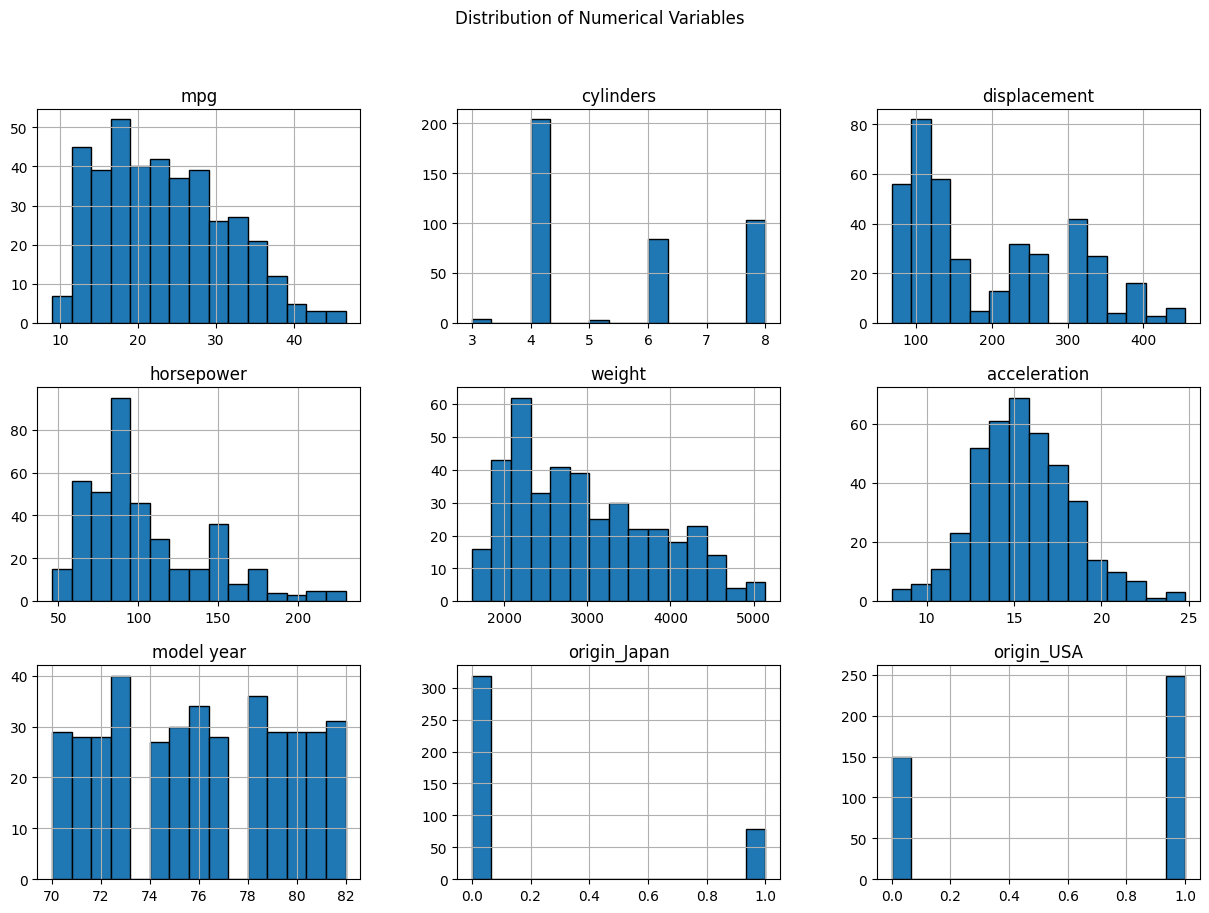

In [ ]:
# Plot histograms for numerical variables
data.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Numerical Variables')
plt.show()



*   mpg: Shows a roughly right-skewed distribution, indicating most cars have moderate fuel efficiency, with a few high-mpg values.

*   Cylinders: The majority of cars have either 4 or 8 cylinders, with fewer cars having 5, 6, or 3 cylinders.

*   Displacement: Skewed towards lower values, with most cars having smaller engine displacement.
*   Horsepower: Shows a similar right-skewed pattern, with most cars having moderate horsepower.

*   Weight: A broad distribution, with a higher concentration of cars around 2,000–3,500 lbs.

*   Acceleration: Approximately normally distributed, indicating balanced acceleration capabilities across cars.
*   Model Year: Fairly uniform distribution across model years, representing a range of vehicles from different eras.





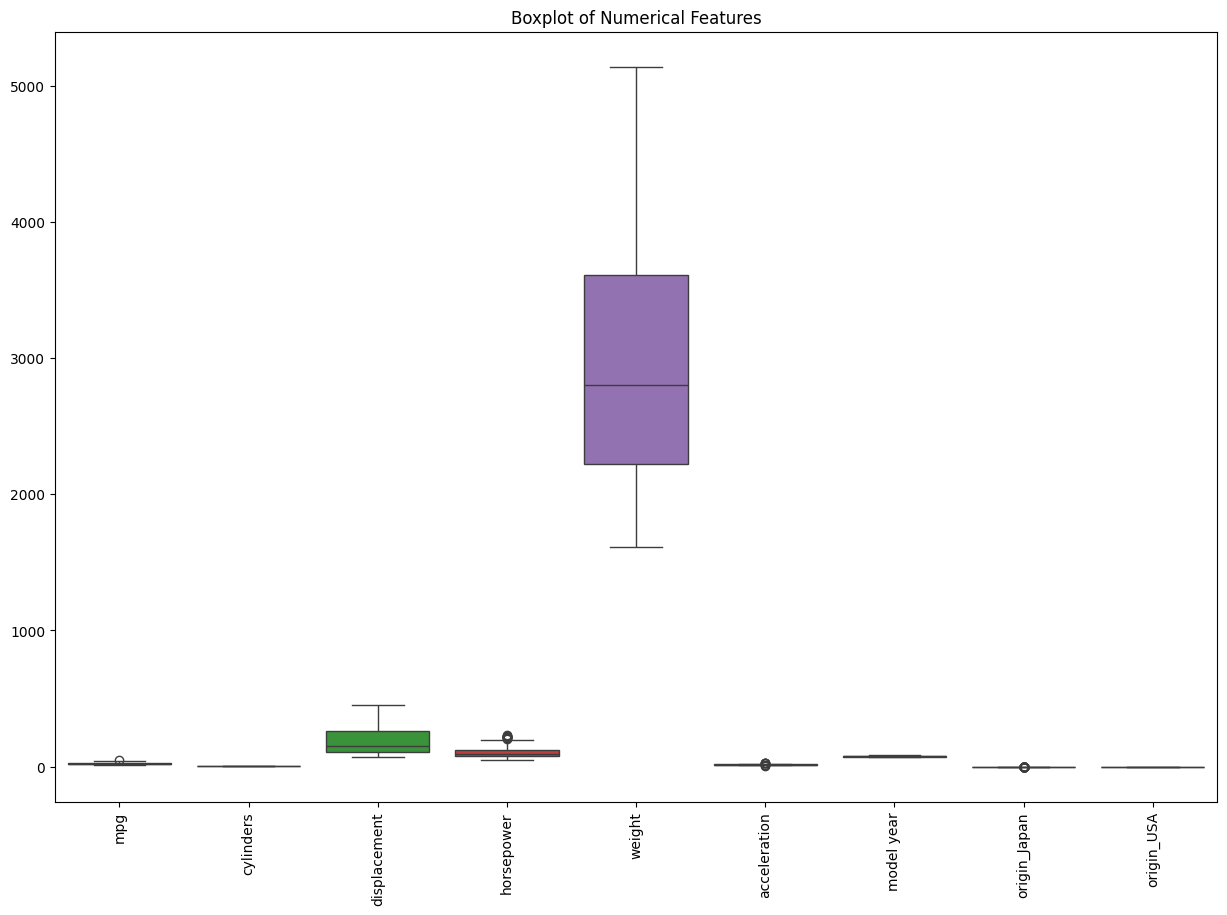

In [ ]:
# Box plots for identifying potential outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.show()


The box plot highlights significant outliers in weight and mpg
*   Weight: Shows a notable outlier (a car that is exceptionally heavy).
*   mpg: Outliers are present among high-mpg values, representing cars with unusually high fuel efficiency compared to others.

*   Displacement: The distribution is right-skewed, meaning most cars have a lower displacement, with fewer cars having high displacement engines

*   Horsepower: Similar to displacement, horsepower is skewed towards lower values, with the majority of cars having moderate power.






#### 3.2 Scatter Plots to Identify Relationships with mpg

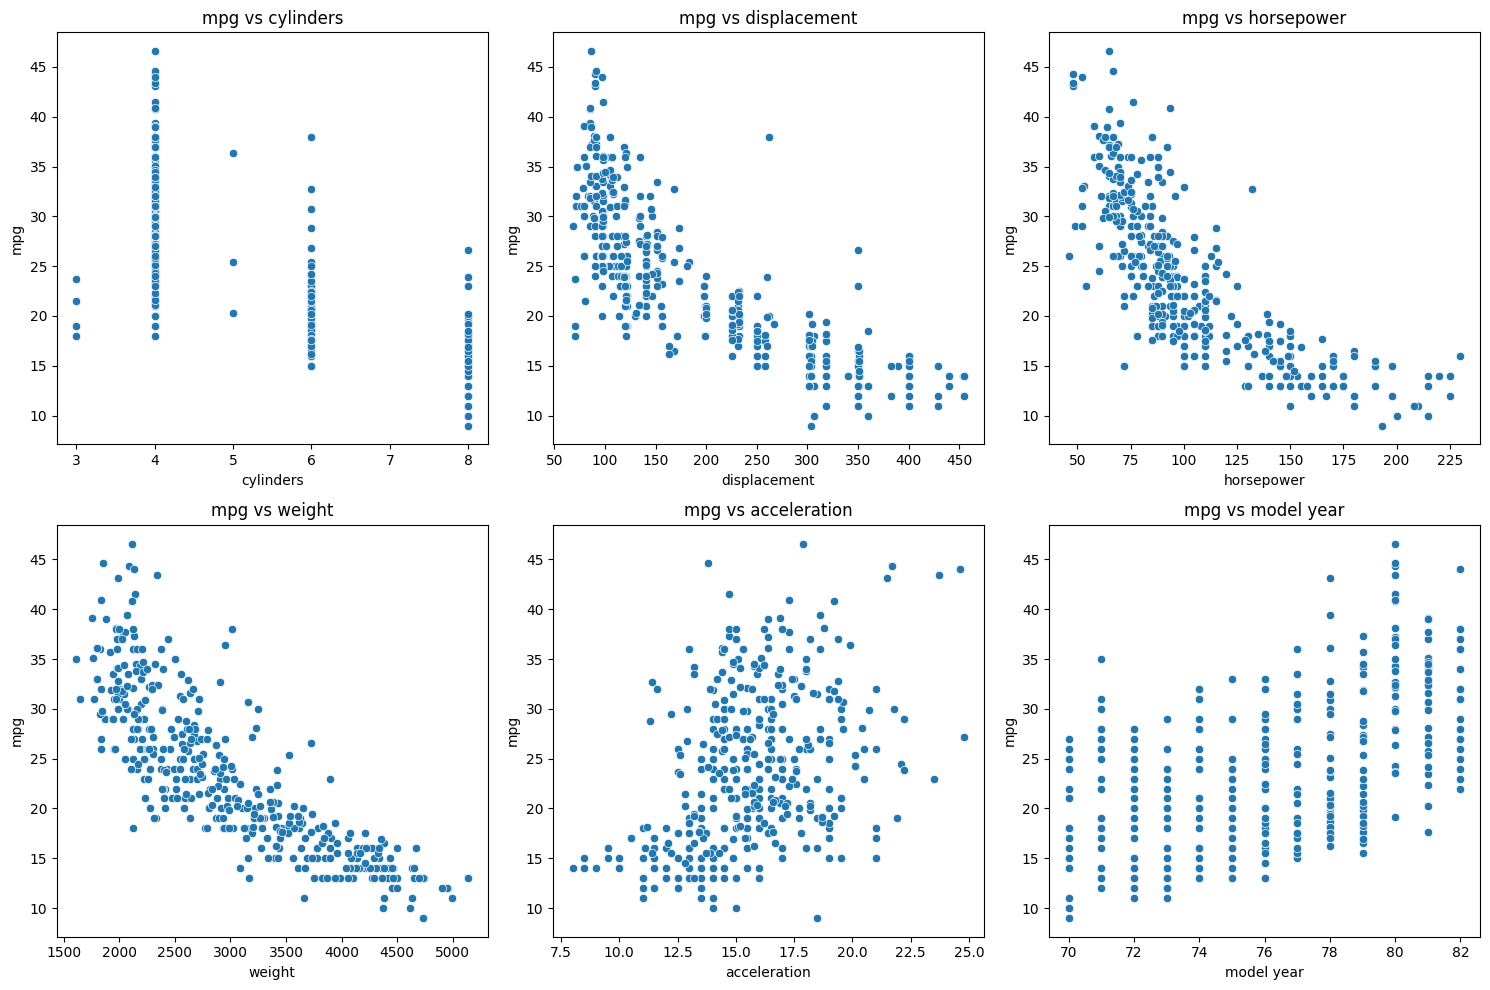

In [ ]:
# Scatter plots of features against mpg
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=feature, y='mpg', data=data)
    plt.title(f'mpg vs {feature}')
plt.tight_layout()
plt.show()




*   mpg vs Cylinders: Shows an inverse relationship, where cars with more cylinders tend to have lower mpg, implying higher fuel consumption.

*   mpg vs Displacement: Displays a strong negative correlation, as cars with larger engine displacement generally have lower mpg.

*   mpg vs Horsepower: Also exhibits a negative correlation, where cars with higher horsepower are associated with lower mpg.
*   mpg vs Weight: Indicates a strong inverse relationship; heavier cars tend to have lower mpg.


*   mpg vs Acceleration: Shows a weaker relationship, though a slight positive trend is visible, suggesting faster-accelerating cars might have slightly better mpg.


*   mpg vs Model Year: There's a positive trend, as newer model years generally have higher mpg, possibly due to improvements in fuel efficiency over time.



Summary:


*   Fuel Efficiency Factors: The scatter plots highlight that factors such as the number of cylinders, displacement, horsepower, and weight negatively impact fuel efficiency. Heavier, more powerful cars with larger engines tend to consume more fuel.

*   Outliers: There are notable outliers in weight and mpg, which may need to be addressed to prevent skewing the model's performance.

*   Model Year Influence: Newer cars in the dataset generally have better fuel efficiency, reflecting advancements in automotive technology.
*   Potential Feature Engineering: Relationships like horsepower-to-weight ratio or efficiency adjustments based on model year could further enhance model accuracy.




#### 3.3 Check for Missing Values and Outliers


In [ ]:
# Identify outliers in the dataset
for column in data.select_dtypes(include=[np.number]).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR)))
    print(f"{column} Outliers: {data[column][outliers].count()}")

mpg Outliers: 1
cylinders Outliers: 0
displacement Outliers: 0
horsepower Outliers: 11
weight Outliers: 0
acceleration Outliers: 7
model year Outliers: 0
origin_Japan Outliers: 79
origin_USA Outliers: 0


In [ ]:
num_cols = data.select_dtypes(include=[np.number]).columns
num_cols

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin_Japan', 'origin_USA'],
      dtype='object')

In [ ]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [ ]:
# Percentage of outliers in each column
((data[num_cols] < lower_whisker) | (data[num_cols] > upper_whisker)).sum()/data.shape[0]*100

,0
mpg,0.251256
cylinders,0.000000
displacement,0.000000
horsepower,2.763819
weight,0.000000
acceleration,1.758794
model year,0.000000
origin_Japan,19.849246
origin_USA,0.000000


In [ ]:
def treat_outliers(df, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

    lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
    upper_whisker = Q3 + 1.5*IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    data[col] = np.clip(df[col], lower_whisker, upper_whisker)
    return df

In [ ]:
data = treat_outliers(data, 'mpg')

data = treat_outliers(data, 'horsepower')

data = treat_outliers(data, 'acceleration')

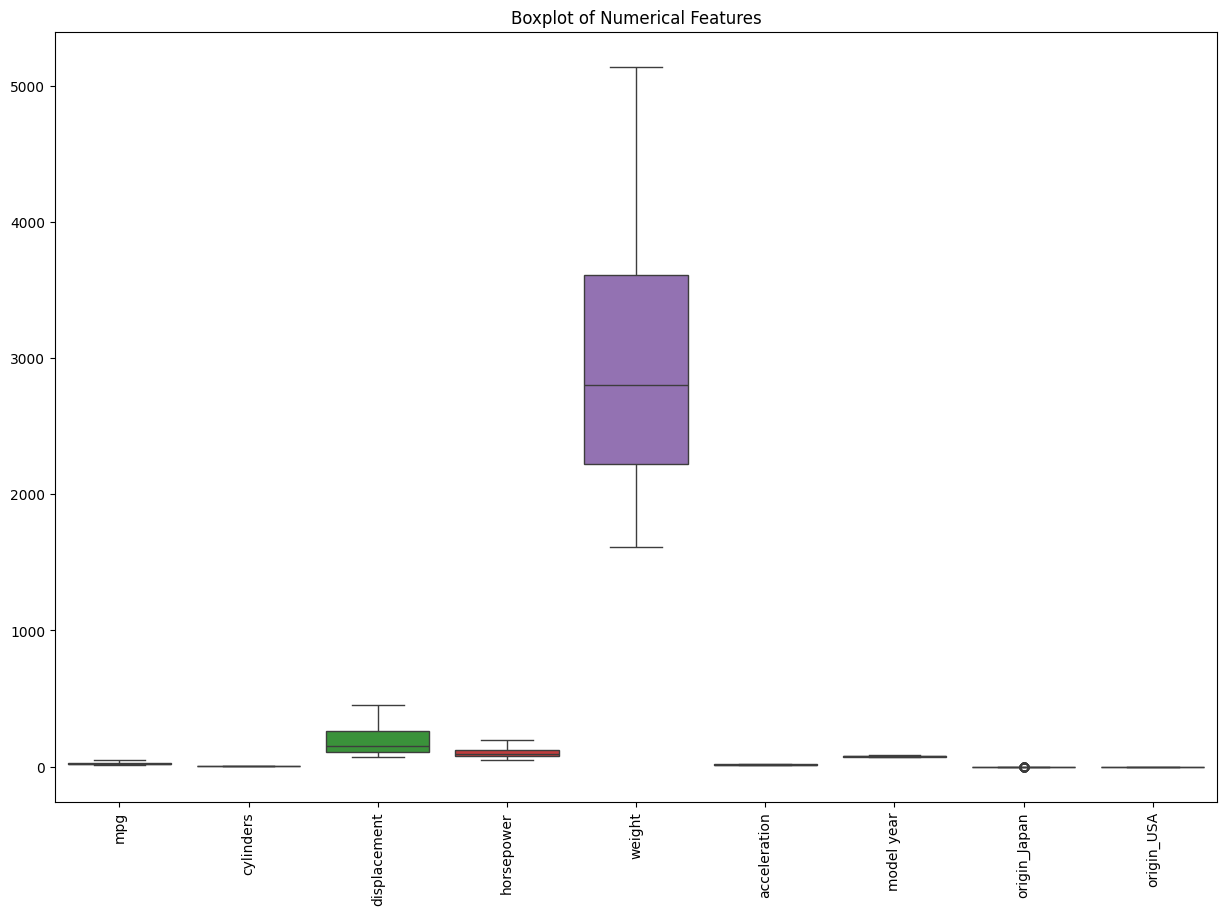

In [ ]:
# Box plots for identifying potential outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

# Step 4: Feature Engineering

In [ ]:
# Add horsepower-to-weight ratio and engine efficiency as new features
data['hp_to_weight'] = data['horsepower'] / data['weight']
data['engine_efficiency'] = data['displacement'] / data['weight']
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Japan,origin_USA,hp_to_weight,engine_efficiency
0,18.0,8,307.0,130.0,3504,12.0,70,0,1,0.037100,0.087614
1,15.0,8,350.0,165.0,3693,11.5,70,0,1,0.044679,0.094774
2,18.0,8,318.0,150.0,3436,11.0,70,0,1,0.043655,0.092549
3,16.0,8,304.0,150.0,3433,12.0,70,0,1,0.043694,0.088552
4,17.0,8,302.0,140.0,3449,10.5,70,0,1,0.040591,0.087562


# Step 5: Model Building

#### 5.1 Linear Regression

In [ ]:
# Select features and target
X = data.drop(['mpg'], axis=1)
y = data[['mpg']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

print("Linear Regression Training R-squared:", r2_score(y_train, y_pred_train))
print("Linear Regression Test R-squared:", r2_score(y_test, y_pred_test))
print("Linear Regression Test MSE:", mean_squared_error(y_test, y_pred_test))


Linear Regression Training R-squared: 0.8432293543762475
Linear Regression Test R-squared: 0.8756140998786289
Linear Regression Test MSE: 7.138676456512594


In [ ]:
print(linear_model.score(X_train, y_train))

print(linear_model.score(X_test, y_test))

0.8432293543762475
0.8756140998786289


#### 5.2 Polynomial Regression

In [ ]:
# Polynomial regression with degree 2
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Make predictions and evaluate the model
y_poly_pred_train = poly_model.predict(X_poly_train)
y_poly_pred_test = poly_model.predict(X_poly_test)

print("Polynomial Regression (Degree 2) Training R-squared:", r2_score(y_train, y_poly_pred_train))
print("Polynomial Regression (Degree 2) Test R-squared:", r2_score(y_test, y_poly_pred_test))
print("Polynomial Regression Test MSE:", mean_squared_error(y_test, y_poly_pred_test))


Polynomial Regression (Degree 2) Training R-squared: 0.9042264491815706
Polynomial Regression (Degree 2) Test R-squared: 0.873416237229186
Polynomial Regression Test MSE: 7.264814791604573


# Step 6: Model Evaluation

In [ ]:
# Cross-validation for model generalization
linear_cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring='r2')
poly_cv_scores = cross_val_score(poly_model, poly.fit_transform(X), y, cv=5, scoring='r2')

print("Linear Regression Cross-Validation R-squared Scores:", linear_cv_scores)
print("Polynomial Regression Cross-Validation R-squared Scores:", poly_cv_scores)


Linear Regression Cross-Validation R-squared Scores: [0.53775858 0.74709664 0.83551547 0.76560247 0.28369334]
Polynomial Regression Cross-Validation R-squared Scores: [-4.29854891  0.6740814   0.82090222  0.80504894  0.39856613]
